In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from experiment_utils import experiment, interactive_alignment_plot_py3dmol
# %matplotlib widget

In [2]:
molecule_sizes = [6, 8, 3]

In [4]:
data_path = "../Data/S1-MA-W1/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')
#mol_set = set()
#for nameA, nameB in molecule_pairs:
#    mol_set.add(nameA)
#    mol_set.add(nameB)
#for name in mol_set:
#    mol = next(pybel.readfile('xyz', os.path.join(data_path, name + '.xyz')))
#    X, _, _ = otm.tl.process_molecule(mol) 
#    _, T_sy2 = otm.tl.parse_sy2(os.path.join(data_path, name + '_chimera.sy2'))
#    T_mna = otm.tl.parse_mna(os.path.join(data_path, name + '.mna'))
#    otm.tl.write_xyz_with_custom_labels('../Data/S1-MA-W1/{}_sy2.xyz'.format(name), X, T_sy2)
#    otm.tl.write_xyz_with_custom_labels('../Data/S1-MA-W1/{}_mna.xyz'.format(name), X, T_mna)

In [5]:
cst_D = 1
alpha_list = np.linspace(0,1,101)
otmol_name_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='element name', 
    alpha_list=alpha_list, 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1',
    cst_D = cst_D,
    save = True
    )
otmol_type_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom type', 
    alpha_list=alpha_list, 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1',
    cst_D = cst_D,
    save = True
    )
otmol_conn_res = experiment(
    data_path, 
    molecule_pairs, 
    setup='atom connectivity', 
    alpha_list=alpha_list, 
    molecule_sizes = molecule_sizes, 
    dataset_name = 'S1MAW1', 
    cst_D = cst_D,
    save = True
    )

0 s1maw1-1 s1maw1-2 1.67 0
1 s1maw1-1 s1maw1-3 0.58 0
2 s1maw1-1 s1maw1-4 0.12 0
3 s1maw1-1 s1maw1-5 0.55 0
4 s1maw1-1 s1maw1-6 1.28 0
5 s1maw1-1 s1maw1-7 1.62 0
6 s1maw1-1 s1maw1-8 1.33 0
7 s1maw1-1 s1maw1-9 1.39 0
8 s1maw1-1 s1maw1-10 0.42 0
9 s1maw1-1 s1maw1-11 0.83 0
10 s1maw1-1 s1maw1-12 0.55 0
11 s1maw1-1 s1maw1-13 0.98 0
12 s1maw1-1 s1maw1-14 1.36 0
13 s1maw1-1 s1maw1-15 0.49 0
14 s1maw1-1 s1maw1-16 0.41 0
15 s1maw1-1 s1maw1-17 1.65 0
16 s1maw1-1 s1maw1-18 1.61 0
17 s1maw1-1 s1maw1-19 1.14 0
18 s1maw1-1 s1maw1-20 1.81 0
0 s1maw1-1 s1maw1-2 1.67 0
1 s1maw1-1 s1maw1-3 0.58 0
2 s1maw1-1 s1maw1-4 0.12 0
3 s1maw1-1 s1maw1-5 0.55 0
4 s1maw1-1 s1maw1-6 1.27 0
5 s1maw1-1 s1maw1-7 1.58 0
6 s1maw1-1 s1maw1-8 1.22 0
7 s1maw1-1 s1maw1-9 1.37 0
8 s1maw1-1 s1maw1-10 0.42 0
9 s1maw1-1 s1maw1-11 0.56 0
10 s1maw1-1 s1maw1-12 0.55 0
11 s1maw1-1 s1maw1-13 1.09 0
12 s1maw1-1 s1maw1-14 1.36 0
13 s1maw1-1 s1maw1-15 0.49 0
14 s1maw1-1 s1maw1-16 0.41 0
15 s1maw1-1 s1maw1-17 1.65 0
16 s1maw1-1 s1maw1-18

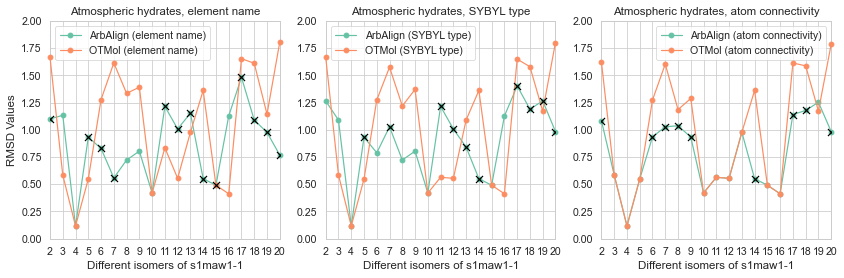

In [5]:
arbalign_res = pd.read_csv('./arbalign_output/S1MAW1_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(ArbAlign+element name)': 'ArbAlign (element name)', 
        'RMSD(ArbAlign+atom type)': 'ArbAlign (SYBYL type)',
        'RMSD(ArbAlign+atom connectivity)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

plt.figure(figsize=(14,4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.subplot(131)
plt.plot(range(2,21), combined_df["ArbAlign (element name)"], marker='o', label="ArbAlign (element name)", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,21))[arbalign_res['reflection_name'] == True], 
            combined_df["ArbAlign (element name)"][arbalign_res['reflection_name'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,21), combined_df["OTMol (element name)"], marker='o', label="OTMol (element name)", clip_on=False, zorder=10)
plt.title("Atmospheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(132)
plt.plot(range(2,21), combined_df["ArbAlign (SYBYL type)"], marker='o', label="ArbAlign (SYBYL type)", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,21))[arbalign_res['reflection_type'] == True], 
            combined_df["ArbAlign (SYBYL type)"][arbalign_res['reflection_type'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,21), combined_df["OTMol (SYBYL type)"], marker='o', label="OTMol (SYBYL type)", clip_on=False, zorder=10)
plt.title("Atmospheric hydrates, SYBYL type")
plt.xlabel("Different isomers of s1maw1-1")
plt.ylim(0, 2)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)

plt.subplot(133)
plt.plot(range(2,21), combined_df["ArbAlign (atom connectivity)"], marker='o', label="ArbAlign (atom connectivity)", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,21))[arbalign_res['reflection_conn'] == True], 
            combined_df["ArbAlign (atom connectivity)"][arbalign_res['reflection_conn'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,21), combined_df["OTMol (atom connectivity)"], marker='o', label="OTMol (atom connectivity)", clip_on=False, zorder=10)
plt.title("Atmospheric hydrates, atom connectivity")
plt.xlabel("Different isomers of s1maw1-1")
plt.ylim(0, 2)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)
plt.savefig("../images/S1MAW1.png", dpi=300, bbox_inches='tight')

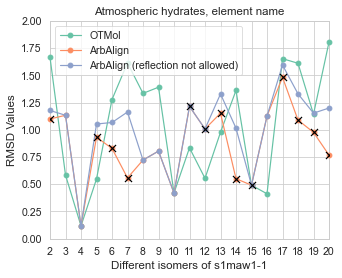

In [5]:
arbalign_res = pd.read_csv('./arbalign_output/S1MAW1_result.csv')
arbalign_res_no_reflection = pd.read_csv('./arbalign_output/no_reflection/S1MAW1_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={'RMSD(ArbAlign+element name)': 'ArbAlign'}), 
    arbalign_res_no_reflection.rename(columns={'RMSD(ArbAlign+element name)': 'ArbAlign (reflection not allowed)'}), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol'}), 
    ], axis=1)
plt.figure(figsize=(5,4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.plot(range(2,21), combined_df["OTMol"], marker='o', label="OTMol", clip_on=False, zorder=10)
plt.plot(range(2,21), combined_df["ArbAlign"], marker='o', label="ArbAlign", clip_on=False, zorder=10)
plt.scatter(
            np.array(range(2,21))[arbalign_res['reflection_name'] == True], 
            combined_df["ArbAlign"][arbalign_res['reflection_name'] == True], 
            color='black',
            marker='x',  # Different marker for False values
            s=50,
            zorder=20,  # Higher zorder to appear on top
        )
plt.plot(range(2,21), combined_df["ArbAlign (reflection not allowed)"], marker='o', label="ArbAlign (reflection not allowed)", clip_on=False, zorder=10)
plt.title("Atmospheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1")
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend().set_zorder(10)
plt.grid(True)
plt.savefig('../images/S1MAW1_element_name.png', dpi=300, bbox_inches='tight')

In [6]:
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-2.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][0]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')
molB2 = next(pybel.readfile("xyz", "./otmol_output/s1maw1-2_to_s1maw1-1_otmol_element_name.xyz"))
X_B2, T_B2, B_B2 = otm.tl.process_molecule(molB2)
interactive_alignment_plot_py3dmol(X_A, X_B2, T_A, T_B2, B_A, B_B2, np.arange(len(X_A)), '', '')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [29]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-3.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][1]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [30]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-20.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][18]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

ArbAlign alignment

In [1]:
import otmol as otm
from openbabel import pybel
import os
import numpy as np
from experiment_utils import interactive_alignment_plot_py3dmol

data_path = "../Data/S1-MA-W1"
molA = next(pybel.readfile("xyz", os.path.join(data_path, 's1maw1-1.xyz')))
molB = next(pybel.readfile("xyz", './arbalign_output/s1maw1-2-aligned_to-s1maw1-1.xyz'))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.tl.write_xyz_with_custom_labels(
    os.path.join('arbalign_output', 's1maw1-2-aligned_to-s1maw1-1_arbalign.xyz'), 
    X_B_aligned, 
    T_B,
    comment="aligned by ArbAlign")
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int))

1.0991218764992043


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
data_path = "../Data/S1-MA-W1"
molA = next(pybel.readfile("xyz", os.path.join(data_path, 's1maw1-1.xyz')))
molB = next(pybel.readfile("xyz", './arbalign_output/s1maw1-2-aligned_to-s1maw1-1.xyz'))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int), save=True)

1.0991218764992043


In [7]:
data_path = "../Data/S1-MA-W1"
molA = next(pybel.readfile("xyz", os.path.join(data_path, 's1maw1-1.xyz')))
molB = next(pybel.readfile("xyz", './arbalign_output/s1maw1-3-aligned_to-s1maw1-1.xyz'))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int), save=True)

1.1335942986632133
